In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import re
import seaborn as sns
import cv2
sns.set_theme(style="whitegrid")

In [2]:
data_path = pathlib.Path("../data/raw/PlantVillage")

In [3]:
path_data = []

for root, dirs, files in os.walk(data_path):
    for d in dirs:
        is_healthy = 1 if d.endswith("healthy") else 0
        leaf_type = d[:d.index("__")]
        
        parent = root+os.sep+d+os.sep
        
        for f in os.listdir(parent):
            path_data.append((leaf_type, is_healthy, d, parent+f))
            
path_df = pd.DataFrame(data=path_data, columns=['Leaf Type', 'Is Healthy', 'Category', 'Image Path'])
path_df.head(10)

,Leaf Type,Is Healthy,Category,Image Path
0,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\00...
1,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\01...
2,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\01...
3,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\02...
4,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\02...
5,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\02...
6,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\02...
7,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\03...
8,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\03...
9,Apple,0,Apple___Apple_scab,..\data\raw\PlantVillage\Apple___Apple_scab\03...


In [26]:
path_df.shape

(54305, 4)

In [5]:
path_df.to_csv("path_data.csv", index=False)

In [6]:
def get_reshaped_image(img, new_shape=(128, 128)):
    resized_image = cv2.resize(img, new_shape, interpolation = cv2.INTER_NEAREST) 
    return resized_image

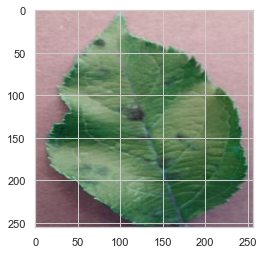

In [9]:
img = cv2.imread(path_df['Image Path'].iloc[0])
plt.imshow(img)

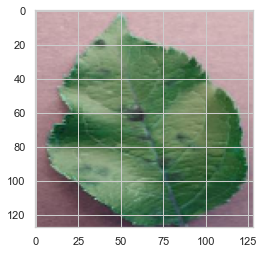

In [10]:
reshaped_img = get_reshaped_image(img)
plt.imshow(reshaped_img)

In [21]:
def transform_data(df):
    features = []
    labels = []
   
    for i, row in df.iterrows():
        img_path = row['Image Path']
        cat = row['Is Healthy']

        try:
            img = cv2.imread(img_path)

            if img is None:
                continue
             
            resized_image = get_reshaped_image(img)

            features.append(resized_image)
            label = [0.0, 0.0]
            label[cat] = 1.0
            labels.append(label)
            
            if i != 0 and i % 1000 == 0:
                print("Processed Images: ",i)
        except:
            print(f"Error in image: img_path={img_path}, cat={cat}")
        
    return features, labels

    
features, labels = transform_data(path_df)
    
print(len(features))
print(len(labels))

features_2 = np.asarray(features)
print(features_2.shape)
labels_2 = np.asarray(labels)
print(labels_2.shape)

Processed Images:  1000
Processed Images:  2000
Processed Images:  3000
Processed Images:  4000
Processed Images:  5000
Processed Images:  6000
Processed Images:  7000
Processed Images:  8000
Processed Images:  9000
Processed Images:  10000
Processed Images:  11000
Processed Images:  12000
Processed Images:  13000
Processed Images:  14000
Processed Images:  15000
Processed Images:  16000
Processed Images:  17000
Processed Images:  18000
Processed Images:  19000
Processed Images:  20000
Processed Images:  21000
Processed Images:  22000
Processed Images:  23000
Processed Images:  24000
Processed Images:  25000
Processed Images:  26000
Processed Images:  27000
Processed Images:  28000
Processed Images:  29000
Processed Images:  30000
Processed Images:  31000
Processed Images:  32000
Processed Images:  33000
Processed Images:  34000
Processed Images:  35000
Processed Images:  36000
Processed Images:  37000
Processed Images:  38000
Processed Images:  39000
Processed Images:  40000
Processed

In [22]:
np.save("features.npy", features_2)

In [23]:
np.save("labels.npy", labels_2)